# Module 5: Assignment 3 
## Image Forensics

![](https://cdn.vox-cdn.com/thumbor/eZBqDFkoM-tqX_GBqfxmuPR4_c4=/0x0:1826x1069/1820x1213/filters:focal(767x389:1059x681):format(webp)/cdn.vox-cdn.com/uploads/chorus_image/image/64005344/adobe_manipulated_faces.0.jpg)

numPy, skimage, scipy, and openCV provide a wealth of tools to manipulate, interrogate, and investigate photo images. Devise a program for foresenic analysis of images that is capable of analysing if a photo has been photoshopped.

Even Adobe is working on this problem: 
* [Adobe’s new AI tool automatically spots Photoshopped faces - The Verge](https://www.theverge.com/2019/6/14/18678782/adobe-machine-learning-ai-tool-spot-fake-facial-edits-liquify-manipulations)
* [New Adobe tool can detect if a face has been photoshopped](https://thenextweb.com/news/adobe-experiment-can-detect-if-a-face-has-been-photoshopped)

Given two photos, you should consider the criteria discuss in class and the tools avaialble to devise an approach to detect image manipulation. Use at least one additional approach beyond what was discussed in class. You do not need to implement any additional algorithms, you may use functions from any available image processing packages. Please write out all your assumptions for your approach.

Your program should take two photos as input and determine if one of them has been photoshopped. You may provide a metric or a simple, "Yes" or "No", but any thresholds you use to make this evaluation should be clearly explained. If you detect image manipulation, highlight the area that has been changed (see module-5-blurring.ipynb). Use the sample photos provided in the `data.zip` file. Some pairs of images have one photoshopped, some do not. There are 3 pairs labelled `mystery-photo-[1-3].jpg`. Please list if you believe they are photoshopped sets or not.


Your program should be designed to work within a juypter notebook so that the images can be visualized.








https://github.com/pidahbus/deep-image-orientation-angle-detection

# Approach
----------
Write you assumptions and approach.

We are assuming that photoshopped areas should have features that stand out. We assume that we can use a combination of differences and a boundary detection filter. None of the given images appear to be rotated, so we will ignore that for now.

In [8]:
import numpy as np
from scipy import ndimage
from skimage import io, color
import matplotlib.pyplot as plt

In [4]:
def mse(imageA, imageB):
	"""Mean Squared Error between the two images is the sum of the squared 
	difference between the two images; NOTE: the two images must have the 
	same dimensiom"""

	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# Return the MSE, the lower the error, the more "similar"
	return err


In [5]:
from scipy.ndimage import rotate

def findrot(img, rotimg):
    rots = [0, 90, 180, 270]
    updates = [45, 45, 45, 45]
    dist = 30
    while (sum(updates) > 1):
        for i in range(len(rots)):
            rot = rots[i]
            higherimg = rotate(img, rot + dist)
            highererror = mse(rotimg, higherimg)
            lowerimg = rotate(img, rot - dist)
            lowererror = mse(rotimg, higherimg)
            update = (lowererror - highererror) * dist
            rots[i] += update
            updates[i] = update
        dist *= 0.8
    return rots

    #rot = rotate(p, 180, reshape=False)

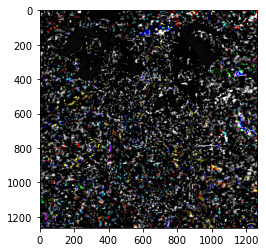

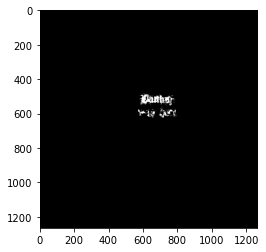

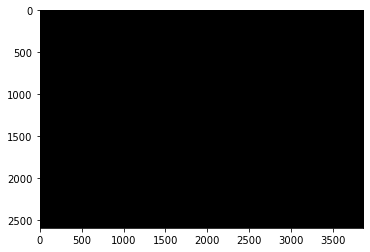

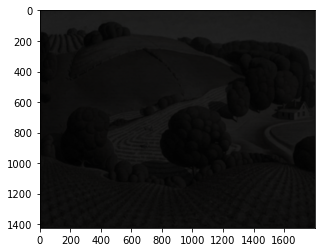

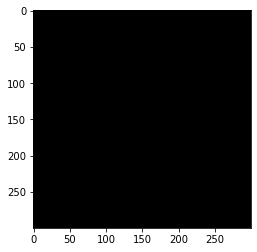

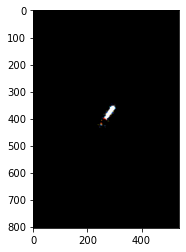

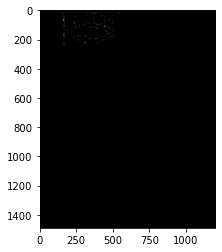

In [18]:
for i in range(7):
    #2 denoise, 3 median 1 sharpen
    a = io.imread(f"data/set-{i+1}-a.jpg")
    a = ndimage.gaussian_filter(a, 2)
    a = ndimage.median_filter(a, 3)
    a = ndimage.gaussian_filter(a, 1)
    b = io.imread(f"data/set-{i+1}-b.jpg")
    b = ndimage.gaussian_filter(b, 2)
    b = ndimage.median_filter(b, 3)
    b = ndimage.gaussian_filter(b, 1)
    #ndimage.gaussian_filter(noisy, 2)
    img = np.abs(a-b)
    #img = ndimage.gaussian_filter(img, 2) #these two honestly don't do much
    #img = ndimage.gaussian_filter(img, 1)
    plt.imshow(img)
    plt.show()

Results
-------

Images 2, 6, and 7 are modified. Images 3 and 5 are not modified. Image 1 is noisy and image 4 has a filter applied.